### Airbnb Project

*In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.*

*There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.*

###### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

###### Reading the given csv files

*Currently we have 6 csv files but not all the files have the desired information required for our project.As I explain the project through jupyter notebook, we can analyse which files may come handy.*

*Train_users dataset will play an important role in our project.Later training and validation dataset will be obtained through train_users dataset.*

In [2]:
train_user = pd.read_csv("train_users_2.csv")

In [3]:
test_users = pd.read_csv("test_users.csv")

In [4]:
sessions = pd.read_csv("sessions.csv")

In [5]:
countries = pd.read_csv("countries.csv")

In [6]:
age_gender_bkts = pd.read_csv("age_gender_bkts.csv")

In [7]:
sample_sub = pd.read_csv("sample_submission_NDF.csv")

*Now let's go through each file and each field in the file to get more insights.*

###### Users

*It's a good practice to split the dataset into train and val before the preprocessing. I will keep the training size to 80% and test size to 20%.*

In [8]:
train_users,val_users = train_test_split(train_user,test_size = 0.2,random_state=42)

In [9]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
139642,85nv87tbl4,2014-01-09,20140109051501,2014-01-09,MALE,31.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
519,svwo8gsij4,2010-05-04,20100504044853,2010-05-27,FEMALE,37.0,basic,3,en,direct,direct,linked,Web,Mac Desktop,Chrome,US
120664,35ja03ym7f,2013-10-30,20131030215606,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
84733,ograyifw83,2013-06-18,20130618071048,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF
183255,a8tr2x328d,2014-05-01,20140501211431,2014-05-05,FEMALE,28.0,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Chrome,US


In [10]:
train_users.shape

(170760, 16)

In [11]:
val_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
153649,q9pfrw6si7,2014-02-17,20140217005503,2014-02-17,FEMALE,27.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,ES
161993,9bzevnmq4v,2014-03-11,20140311181449,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
81536,kux37wpcfo,2013-06-04,20130604060604,NaN,MALE,52.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF
36756,qqnj6ohayo,2012-08-16,20120816172708,NaN,FEMALE,45.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF
74429,nw97iy2dzi,2013-05-02,20130502074337,2013-05-03,FEMALE,35.0,facebook,0,en,direct,direct,linked,Web,Mac Desktop,Firefox,FR


In [12]:
val_users.shape

(42691, 16)

In [13]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
139642,85nv87tbl4,2014-01-09,20140109051501,2014-01-09,MALE,31.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
519,svwo8gsij4,2010-05-04,20100504044853,2010-05-27,FEMALE,37.0,basic,3,en,direct,direct,linked,Web,Mac Desktop,Chrome,US
120664,35ja03ym7f,2013-10-30,20131030215606,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
84733,ograyifw83,2013-06-18,20130618071048,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF
183255,a8tr2x328d,2014-05-01,20140501211431,2014-05-05,FEMALE,28.0,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Chrome,US


*Getting more information on the train datset*

In [14]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170760 entries, 139642 to 121958
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       170760 non-null  object 
 1   date_account_created     170760 non-null  object 
 2   timestamp_first_active   170760 non-null  int64  
 3   date_first_booking       71060 non-null   object 
 4   gender                   170760 non-null  object 
 5   age                      100309 non-null  float64
 6   signup_method            170760 non-null  object 
 7   signup_flow              170760 non-null  int64  
 8   language                 170760 non-null  object 
 9   affiliate_channel        170760 non-null  object 
 10  affiliate_provider       170760 non-null  object 
 11  first_affiliate_tracked  165844 non-null  object 
 12  signup_app               170760 non-null  object 
 13  first_device_type        170760 non-null  object 
 14  firs

In [15]:
train_users.describe()

,timestamp_first_active,age,signup_flow
count,1.707600e+05,100309.000000,170760.000000
mean,2.013085e+13,49.658186,3.275890
std,9.256034e+09,155.692226,7.647473
min,2.009032e+13,1.000000,0.000000
25%,2.012122e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [16]:
train_users.describe(include = object)

,id,date_account_created,date_first_booking,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,170760,170760,71060,170760,170760,170760,170760,170760,165844,170760,170760,170760,170760
unique,170760,1632,1963,4,3,25,8,18,7,4,9,50,12
top,85nv87tbl4,2014-05-13,2014-05-22,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,1,535,209,76554,122189,165029,110161,109908,87191,146111,71603,51052,99700


*When info function was used, it can be observed that there are few columns whhich does not have 170760 non-null values. Let's examine a bit more on this by checking the null values.*

In [17]:
train_users.isna().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         99700
gender                         0
age                        70451
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked     4916
signup_app                     0
first_device_type              0
first_browser                  0
country_destination            0
dtype: int64

*Null values in terms of percentage*

In [18]:
round((train_users.isna().sum()/train_users.shape[0])*100,2)

id                          0.00
date_account_created        0.00
timestamp_first_active      0.00
date_first_booking         58.39
gender                      0.00
age                        41.26
signup_method               0.00
signup_flow                 0.00
language                    0.00
affiliate_channel           0.00
affiliate_provider          0.00
first_affiliate_tracked     2.88
signup_app                  0.00
first_device_type           0.00
first_browser               0.00
country_destination         0.00
dtype: float64

*first_affiliate_tracked has less null values in training set, but the field date_first_booking and age has more null values,Let's explore more about the fileds which has null values to understand the reason if any.*

In [19]:
train_users[train_users["date_first_booking"].isna()]["country_destination"].value_counts()

country_destination
NDF    99700
Name: count, dtype: int64

*Now, we can understand why there are lot of null values in date_first_booking field. It is because, when the user does not book , then the target variable would be NDF and also date_first_booking will have null value. This field also can be dropped as this will not help us much. For datetime related features, we have other fields to look into.*

In [20]:
train_users.drop("date_first_booking", axis = 1, inplace = True)

In [21]:
val_users.drop("date_first_booking", axis = 1, inplace = True)

*Coming to the field age, around 41.2% of the dataset has null values. Removing the records with null value will not help as this will cause a huge reduction in number of data points for training.*

*So let's explore more about the age field later on why there are lot of missing values and also on how we can reduce it, before that we will see the first_affiliate_tracked field which has around 3% null values in training set.*

In [22]:
train_users["first_affiliate_tracked"].value_counts()

first_affiliate_tracked
untracked        87191
linked           37101
omg              35186
tracked-other     4958
product           1265
marketing          115
local ops           28
Name: count, dtype: int64

*Since the number of data points which are null are very less, I will impute the null values will the category having the maximum frequency.*

In [23]:
train_users["first_affiliate_tracked"] = train_users["first_affiliate_tracked"].fillna(train_users["first_affiliate_tracked"].mode().iloc[0])

In [24]:
val_users["first_affiliate_tracked"] = val_users["first_affiliate_tracked"].fillna(val_users["first_affiliate_tracked"].mode().iloc[0])

*Let's go to each field one by one and perform the necessary operations*  

In [25]:
train_users.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
139642,85nv87tbl4,2014-01-09,20140109051501,MALE,31.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
519,svwo8gsij4,2010-05-04,20100504044853,FEMALE,37.0,basic,3,en,direct,direct,linked,Web,Mac Desktop,Chrome,US
120664,35ja03ym7f,2013-10-30,20131030215606,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
84733,ograyifw83,2013-06-18,20130618071048,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF
183255,a8tr2x328d,2014-05-01,20140501211431,FEMALE,28.0,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Chrome,US


*Let me start with the target variable*

In [26]:
train_users["country_destination"].value_counts()

country_destination
NDF      99700
US       49851
other     8088
FR        4013
IT        2273
GB        1827
ES        1798
CA        1153
DE         853
NL         607
AU         425
PT         172
Name: count, dtype: int64

In [27]:
sns.countplot(train_users["country_destination"])

*Quite an imbalanced data set with most of the data points from US, NDF and others, will looks into this issue later before training the model.*

*For this application where we try to predict which country they might visit, seasonality plays an important role. So let's focus on extarcting the month from datetime related fields instead of exact date.*

In [28]:
train_users["date_account_created"] = pd.to_datetime(train_users["date_account_created"])
train_users["account_created_month"] = train_users["date_account_created"].dt.month

In [29]:
train_users.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_month
139642,85nv87tbl4,2014-01-09,20140109051501,MALE,31.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1
519,svwo8gsij4,2010-05-04,20100504044853,FEMALE,37.0,basic,3,en,direct,direct,linked,Web,Mac Desktop,Chrome,US,5
120664,35ja03ym7f,2013-10-30,20131030215606,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,10
84733,ograyifw83,2013-06-18,20130618071048,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF,6
183255,a8tr2x328d,2014-05-01,20140501211431,FEMALE,28.0,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Chrome,US,5


<Axes: ylabel='count'>

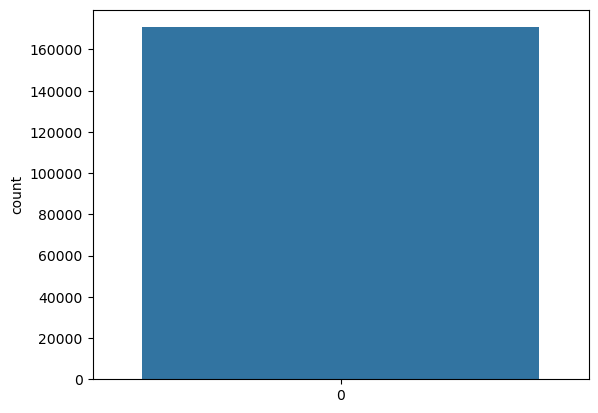

In [30]:
sns.countplot(train_users["account_created_month"])

*Most of the accounts were created from the month of march to June.*

Performing the same operation in validation dataset.

In [31]:
val_users["date_account_created"] = pd.to_datetime(val_users["date_account_created"])
val_users["account_created_month"] = val_users["date_account_created"].dt.month

In [32]:
val_users.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_month
153649,q9pfrw6si7,2014-02-17,20140217005503,FEMALE,27.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,ES,2
161993,9bzevnmq4v,2014-03-11,20140311181449,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,3
81536,kux37wpcfo,2013-06-04,20130604060604,MALE,52.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF,6
36756,qqnj6ohayo,2012-08-16,20120816172708,FEMALE,45.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF,8
74429,nw97iy2dzi,2013-05-02,20130502074337,FEMALE,35.0,facebook,0,en,direct,direct,linked,Web,Mac Desktop,Firefox,FR,5


*Writing a function to preprocess timestamp_first_active field to extract the month.*

In [33]:
def first_active_month(s):
    a = str(s)
    b = a[4:6]
    return int(b)

train_users["first_active_month"] = train_users["timestamp_first_active"].apply(first_active_month)

In [34]:
train_users.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_month,first_active_month
139642,85nv87tbl4,2014-01-09,20140109051501,MALE,31.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1,1
519,svwo8gsij4,2010-05-04,20100504044853,FEMALE,37.0,basic,3,en,direct,direct,linked,Web,Mac Desktop,Chrome,US,5,5
120664,35ja03ym7f,2013-10-30,20131030215606,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,10,10
84733,ograyifw83,2013-06-18,20130618071048,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF,6,6
183255,a8tr2x328d,2014-05-01,20140501211431,FEMALE,28.0,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Chrome,US,5,5


<Axes: ylabel='count'>

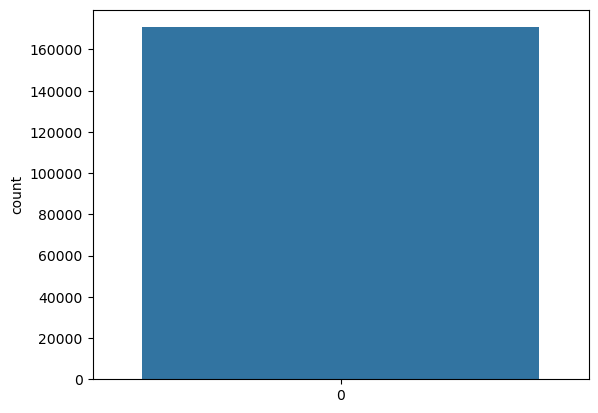

In [35]:
sns.countplot(train_users["first_active_month"])

*The graph of first active month is similar to that of the time the account was ceated showing that users have tried to search for options as soon as they have registered.*

In [36]:
val_users["first_active_month"] = val_users["timestamp_first_active"].apply(first_active_month)

In [37]:
val_users.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_month,first_active_month
153649,q9pfrw6si7,2014-02-17,20140217005503,FEMALE,27.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,ES,2,2
161993,9bzevnmq4v,2014-03-11,20140311181449,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,3,3
81536,kux37wpcfo,2013-06-04,20130604060604,MALE,52.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF,6,6
36756,qqnj6ohayo,2012-08-16,20120816172708,FEMALE,45.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF,8,8
74429,nw97iy2dzi,2013-05-02,20130502074337,FEMALE,35.0,facebook,0,en,direct,direct,linked,Web,Mac Desktop,Firefox,FR,5,5


In [38]:
train_users.drop("date_account_created", axis = 1, inplace = True)
val_users.drop("date_account_created", axis = 1, inplace = True)
train_users.drop("timestamp_first_active", axis = 1, inplace = True)
val_users.drop("timestamp_first_active", axis = 1, inplace = True)

In [39]:
train_users["gender"].value_counts()

gender
-unknown-    76554
FEMALE       50411
MALE         43574
OTHER          221
Name: count, dtype: int64

In [ ]:
sns.countplot(train_users["gender"])

In [ ]:
sns.countplot(train_users["gender"] , hue = train_users["country_destination"])
sns.set(rc={'figure.figsize':(20,10)})

*There are records with entry -unknown-.Sincethe percentage of records with this entry is very high, I would not like to delete it.*

*One hot encoding the gender field, I prefer OHE over label encoding since label encoding introduces ordinality which does not make sense for the exapmles shown below.*

In [40]:
ohe_gender = pd.get_dummies(train_users["gender"]) 
train_users = pd.concat([train_users,ohe_gender],axis = 1) 

In [41]:
train_users.rename({'-unknown-':'Gender_Unknown','FEMALE':'Gender_Female','MALE':'Gender_Male','OTHER':'Gender_Other'},axis = 1, inplace = True)

*Also after performing one hot encoding on variable, the variable can be dropped since we will have the new one hot encoded fields* 

In [42]:
train_users.drop("gender", axis = 1, inplace = True)

In [43]:
ohe_gender = pd.get_dummies(val_users["gender"]) 
val_users = pd.concat([val_users,ohe_gender],axis = 1) 

val_users.rename({'-unknown-':'Gender_Unknown','FEMALE':'Gender_Female','MALE':'Gender_Male','OTHER':'Gender_Other'},axis = 1, inplace = True)

val_users.drop("gender", axis = 1, inplace = True)

In [44]:
train_users.head()

,id,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_month,first_active_month,Gender_Unknown,Gender_Female,Gender_Male,Gender_Other
139642,85nv87tbl4,31.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1,1,False,False,True,False
519,svwo8gsij4,37.0,basic,3,en,direct,direct,linked,Web,Mac Desktop,Chrome,US,5,5,False,True,False,False
120664,35ja03ym7f,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,10,10,True,False,False,False
84733,ograyifw83,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF,6,6,True,False,False,False
183255,a8tr2x328d,28.0,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Chrome,US,5,5,False,True,False,False


*Dealing with age column.*

<Axes: >

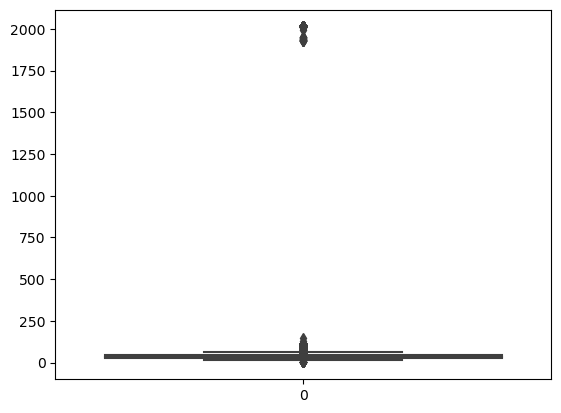

In [45]:
sns.boxplot(train_users["age"])

<Axes: xlabel='age', ylabel='Count'>

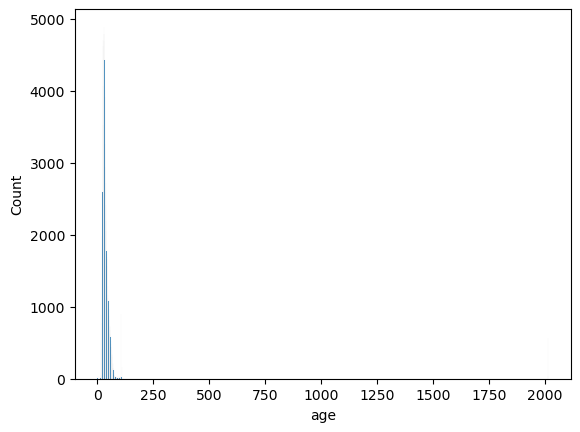

In [46]:
sns.histplot(train_users["age"])

*Now, after analysing the data, I have noted that there are customers who have entered the year of birth instead of the age. So I will also include values greater than 1920 and later sybtract by 2015 to get the age.*

In [47]:
train_users = train_users[(train_users["age"]>1920) | (train_users["age"]<100) | train_users["age"].isna()]

In [48]:
val_users = val_users[(val_users["age"]>1920) | (val_users["age"]<100) | val_users["age"].isna()]

In [49]:
train_users.shape

(169497, 18)

In [50]:
val_users.shape

(42362, 18)

In [51]:
def current_age(a):
    
    if(a >= 1920):
        return 2015 - a
    else:
        return a

In [52]:
train_users["age"] = train_users["age"].apply(current_age)

In [53]:
val_users["age"] = val_users["age"].apply(current_age)

In [54]:
train_users["age"] = train_users["age"].fillna(train_users["age"].median())

In [55]:
val_users["age"] = val_users["age"].fillna(val_users["age"].median())

<Axes: xlabel='age', ylabel='Density'>

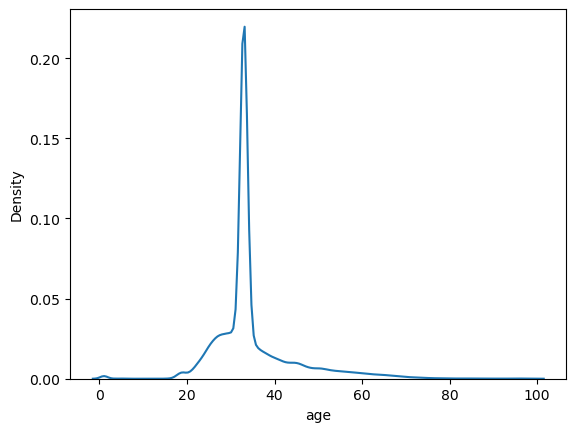

In [56]:
sns.kdeplot(train_users["age"])

In [ ]:
sns.boxplot(train_users["country_destination"] , train_users["age"] )

*looks like visitors travelling to spain and Portugal are young compared to other countries, in other words young travellers prefer to go to spain and portugal.*

*The peak in the age field is due to the missing value imputation done where the null records were replaced by median values.*

In [57]:
train_users["signup_method"].value_counts()

signup_method
basic       121264
facebook     47786
google         447
Name: count, dtype: int64

In [ ]:
sns.countplot(train_users["signup_method"])

In [ ]:
sns.countplot(train_users["signup_method"],hue = train_users["country_destination"])

*Performing OHE,renaming the columns and dropping the unecessary columns.*

In [58]:
ohe_signup = pd.get_dummies(train_users["signup_method"]) 
train_users = pd.concat([train_users,ohe_signup],axis = 1)  

In [59]:
train_users.rename({'basic':'Signup_Basic','facebook':'Signup_Facebook','google':'Signup_Google'},axis = 1, inplace = True)

In [60]:
train_users.drop("signup_method", axis = 1, inplace = True)

In [61]:
ohe_signup = pd.get_dummies(val_users["signup_method"]) 
val_users = pd.concat([val_users,ohe_signup],axis = 1) 

val_users.rename({'basic':'Signup_Basic','facebook':'Signup_Facebook','google':'Signup_Google'},axis = 1, inplace = True)

val_users.drop("signup_method", axis = 1, inplace = True)

In [62]:
train_users["signup_flow"].value_counts()

signup_flow
0     130683
25     11718
12      7449
3       7009
2       5444
24      3474
23      2238
1        828
6        253
8        189
21       154
5         29
20        12
16         8
15         7
10         1
4          1
Name: count, dtype: int64

In [ ]:
sns.kdeplot(train_users["signup_flow"])

In [63]:
train_users.head()

,id,age,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_month,first_active_month,Gender_Unknown,Gender_Female,Gender_Male,Gender_Other,Signup_Basic,Signup_Facebook,Signup_Google
139642,85nv87tbl4,31.0,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1,1,False,False,True,False,True,False,False
519,svwo8gsij4,37.0,3,en,direct,direct,linked,Web,Mac Desktop,Chrome,US,5,5,False,True,False,False,True,False,False
120664,35ja03ym7f,33.0,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,10,10,True,False,False,False,True,False,False
84733,ograyifw83,33.0,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF,6,6,True,False,False,False,True,False,False
183255,a8tr2x328d,28.0,0,en,sem-brand,google,untracked,Web,Mac Desktop,Chrome,US,5,5,False,True,False,False,True,False,False


In [64]:
train_users["language"].value_counts()

language
en    163795
zh      1321
fr       929
es       725
de       587
ko       579
it       411
ru       326
pt       193
ja       169
sv        90
nl        82
tr        49
pl        47
da        45
cs        28
no        25
el        22
id        17
hu        16
th        15
fi        14
is         5
ca         5
hr         2
Name: count, dtype: int64

*Looking into the language, you will find lot of languages with few of the languages having less records. So manual preprocessing for this column is required where certain languages will be kept under the bin called others.*

*The binning will be done with help of the file countries.csv since the file has details about the langauges spoken in the destination country.*

*Now another field language_levenshtein_distance will tell how good is the customer in understanding english. Lower value of language_levenshtein_distance will
indicate that he is good in english whereas high values indicate he is not so comfortable to speak in english.*

In [65]:
countries.head(10)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [66]:
def rename_languages_country(s):
    
    if s=='eng':
        return 'English'
    elif s=='deu':
        return 'German'
    elif s=='spa':
        return 'Spanish'
    elif s=="fra":
        return 'French'
    elif s=='ita':
        return 'Italian'
    elif s=='nld':
        return 'Dutch'
    elif s=='por':
        return 'Portuguese'

In [67]:
countries["Destination_language"]=countries["destination_language "].apply(rename_languages_country)

In [68]:
countries.head(10)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,Destination_language
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00,English
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00,English
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61,German
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25,Spanish
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06,French
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00,English
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40,Italian
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22,Dutch
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45,Portuguese
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00,English


In [69]:
df_countries = countries[['Destination_language', 'language_levenshtein_distance']]

In [70]:
df_countries.drop_duplicates(keep='first',inplace = True)

In [71]:
df_countries.head()

,Destination_language,language_levenshtein_distance
0,English,0.00
2,German,72.61
3,Spanish,92.25
4,French,92.06
6,Italian,89.40


In [ ]:
sns.barplot(df_countries["Destination_language"],df_countries["language_levenshtein_distance"])

In [72]:
def rename_languages_users(s):
    
    if s == 'en':
        return 'English'
    elif s=='es':
        return 'Spanish'
    elif s=="fr":
        return 'French'
    elif s=='de':
        return 'German'
    elif s=='it':
        return 'Italian'
    elif s=='nl':
        return 'Dutch'
    elif s=='pt':
        return 'Portuguese'
    else:
        return 'Others'

In [73]:
train_users["user_language"] = train_users["language"].apply(rename_languages_users)

In [74]:
train_users["user_language"].value_counts()

user_language
English       163795
Others          2775
French           929
Spanish          725
German           587
Italian          411
Portuguese       193
Dutch             82
Name: count, dtype: int64

In [75]:
val_users["user_language"] = val_users["language"].apply(rename_languages_users)

In [76]:
val_users["user_language"].value_counts()

user_language
English       40965
Others          677
French          231
Spanish         186
German          144
Italian          99
Portuguese       45
Dutch            15
Name: count, dtype: int64

In [ ]:
sns.countplot(train_users["user_language"])

*Even after adding an field called others to sum up lessa frequent languages, english dominates the list of most spoken languages among the touristor as expected since the uers\customers are from US.*

In [77]:
train_users = train_users.merge(df_countries,left_on = 'user_language',right_on = 'Destination_language',how = 'left')

In [78]:
train_users.shape

(169497, 23)

In [79]:
val_users = val_users.merge(df_countries,left_on = 'user_language',right_on = 'Destination_language',how = 'left')

In [80]:
val_users.shape

(42362, 23)

In [81]:
train_users["user_language"].value_counts()

user_language
English       163795
Others          2775
French           929
Spanish          725
German           587
Italian          411
Portuguese       193
Dutch             82
Name: count, dtype: int64

In [82]:
ohe_language = pd.get_dummies(train_users["user_language"]) 
train_users = pd.concat([train_users,ohe_language],axis = 1) 

In [83]:
train_users.head()

,id,age,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,...,Destination_language,language_levenshtein_distance,Dutch,English,French,German,Italian,Others,Portuguese,Spanish
0,85nv87tbl4,31.0,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,...,English,0.0,False,True,False,False,False,False,False,False
1,svwo8gsij4,37.0,3,en,direct,direct,linked,Web,Mac Desktop,Chrome,...,English,0.0,False,True,False,False,False,False,False,False
2,35ja03ym7f,33.0,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,...,English,0.0,False,True,False,False,False,False,False,False
3,ograyifw83,33.0,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,...,English,0.0,False,True,False,False,False,False,False,False
4,a8tr2x328d,28.0,0,en,sem-brand,google,untracked,Web,Mac Desktop,Chrome,...,English,0.0,False,True,False,False,False,False,False,False


In [84]:
train_users.rename({'Others':'Other_Language'},axis = 1, inplace = True)

In [85]:
train_users.drop(["user_language","Destination_language"], axis = 1, inplace = True)

In [86]:
train_users.head()

,id,age,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,...,Signup_Google,language_levenshtein_distance,Dutch,English,French,German,Italian,Other_Language,Portuguese,Spanish
0,85nv87tbl4,31.0,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,...,False,0.0,False,True,False,False,False,False,False,False
1,svwo8gsij4,37.0,3,en,direct,direct,linked,Web,Mac Desktop,Chrome,...,False,0.0,False,True,False,False,False,False,False,False
2,35ja03ym7f,33.0,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,...,False,0.0,False,True,False,False,False,False,False,False
3,ograyifw83,33.0,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,...,False,0.0,False,True,False,False,False,False,False,False
4,a8tr2x328d,28.0,0,en,sem-brand,google,untracked,Web,Mac Desktop,Chrome,...,False,0.0,False,True,False,False,False,False,False,False


In [87]:
train_users.drop(["language"], axis = 1, inplace = True)

In [88]:
train_users.head()

,id,age,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,...,Signup_Google,language_levenshtein_distance,Dutch,English,French,German,Italian,Other_Language,Portuguese,Spanish
0,85nv87tbl4,31.0,0,direct,direct,untracked,Web,Mac Desktop,Chrome,US,...,False,0.0,False,True,False,False,False,False,False,False
1,svwo8gsij4,37.0,3,direct,direct,linked,Web,Mac Desktop,Chrome,US,...,False,0.0,False,True,False,False,False,False,False,False
2,35ja03ym7f,33.0,0,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,...,False,0.0,False,True,False,False,False,False,False,False
3,ograyifw83,33.0,0,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF,...,False,0.0,False,True,False,False,False,False,False,False
4,a8tr2x328d,28.0,0,sem-brand,google,untracked,Web,Mac Desktop,Chrome,US,...,False,0.0,False,True,False,False,False,False,False,False


In [89]:
ohe_language = pd.get_dummies(val_users["user_language"]) 
val_users = pd.concat([val_users,ohe_language],axis = 1) 

val_users.rename({'Others':'Other_Language'},axis = 1, inplace = True)
val_users.drop(["user_language","Destination_language","language"], axis = 1, inplace = True)

In [90]:
train_users["language_levenshtein_distance"] = train_users["language_levenshtein_distance"].fillna(train_users["age"].mean())

In [91]:
val_users["language_levenshtein_distance"] = val_users["language_levenshtein_distance"].fillna(val_users["age"].mean())

In [ ]:
sns.kdeplot(train_users["language_levenshtein_distance"])

In [92]:
train_users["affiliate_channel"].value_counts()

affiliate_channel
direct           109343
sem-brand         20542
sem-non-brand     15046
other              7185
seo                6906
api                6520
content            3081
remarketing         874
Name: count, dtype: int64

In [93]:
def affiliate_channel(s):
    
    if s == "direct":
        return "direct_channel"
    elif s == "sem-brand":
        return "sem-brand_channel"
    elif s == "sem-non-brand":
        return "sem-non-brand_channel"
    else:
        return "other_channels"

In [94]:
train_users["affiliate_channel"] = train_users["affiliate_channel"].apply(affiliate_channel)

In [ ]:
sns.countplot(train_users["affiliate_channel"])

In [95]:
ohe_channel = pd.get_dummies(train_users["affiliate_channel"]) 
train_users = pd.concat([train_users,ohe_channel],axis = 1) 
train_users.drop("affiliate_channel", axis = 1, inplace = True)

In [96]:
val_users.columns

Index(['id', 'age', 'signup_flow', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'account_created_month',
       'first_active_month', 'Gender_Unknown', 'Gender_Female', 'Gender_Male',
       'Gender_Other', 'Signup_Basic', 'Signup_Facebook', 'Signup_Google',
       'language_levenshtein_distance', 'Dutch', 'English', 'French', 'German',
       'Italian', 'Other_Language', 'Portuguese', 'Spanish'],
      dtype='object')

In [97]:
val_users["affiliate_channel"] = val_users["affiliate_channel"].apply(affiliate_channel)
ohe_channel = pd.get_dummies(val_users["affiliate_channel"]) 
val_users = pd.concat([val_users,ohe_channel],axis = 1) 
val_users.drop("affiliate_channel", axis = 1, inplace = True)

In [98]:
train_users["affiliate_provider"].value_counts()

affiliate_provider
direct                 109090
google                  40934
other                   10057
craigslist               2805
bing                     1883
facebook                 1806
vast                      653
padmapper                 609
facebook-open-graph       436
yahoo                     390
gsp                       353
meetup                    275
email-marketing           127
naver                      39
baidu                      22
yandex                     12
wayn                        5
daum                        1
Name: count, dtype: int64

In [ ]:
sns.countplot(train_users["affiliate_provider"])

In [99]:
def affiliate_provider (s):
    
    if s=="direct":
        return "direct_provider"
    elif s=="google":
        return "google_provider"
    elif s=="craigslist":
        return "craiglist_provider"
    elif s=="bing":
        return "bing_provider"
    elif s=="facebook" or s=="facebook-open-graph":
        return "facebook_provider"
    else:
        return "other_providers"

In [100]:
train_users["affiliate_provider"] = train_users["affiliate_provider"].apply(affiliate_provider)

In [101]:
ohe_provider = pd.get_dummies(train_users["affiliate_provider"]) 
train_users = pd.concat([train_users,ohe_provider],axis = 1) 
train_users.drop("affiliate_provider", axis = 1, inplace = True)

In [102]:
train_users.columns

Index(['id', 'age', 'signup_flow', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination',
       'account_created_month', 'first_active_month', 'Gender_Unknown',
       'Gender_Female', 'Gender_Male', 'Gender_Other', 'Signup_Basic',
       'Signup_Facebook', 'Signup_Google', 'language_levenshtein_distance',
       'Dutch', 'English', 'French', 'German', 'Italian', 'Other_Language',
       'Portuguese', 'Spanish', 'direct_channel', 'other_channels',
       'sem-brand_channel', 'sem-non-brand_channel', 'bing_provider',
       'craiglist_provider', 'direct_provider', 'facebook_provider',
       'google_provider', 'other_providers'],
      dtype='object')

In [103]:
val_users["affiliate_provider"] = val_users["affiliate_provider"].apply(affiliate_provider)
ohe_provider = pd.get_dummies(val_users["affiliate_provider"]) 
val_users = pd.concat([val_users,ohe_provider],axis = 1) 
val_users.drop("affiliate_provider", axis = 1, inplace = True)

In [104]:
train_users["first_affiliate_tracked"].value_counts()

first_affiliate_tracked
untracked        91450
linked           36821
omg              34927
tracked-other     4902
product           1255
marketing          115
local ops           27
Name: count, dtype: int64

In [ ]:
sns.countplot(train_users["first_affiliate_tracked"])

In [105]:
def affiliate_tracker (s):
    
    if s=="untracked":
        return s
    elif s == "linked":
        return "linked_tracker"
    elif s == "omg":
        return "omg_tracker"
    else:
        return "other_tracker"

In [106]:
train_users["first_affiliate_tracked"] = train_users["first_affiliate_tracked"].apply(affiliate_tracker)

*Most of the requestors were untracked during initial activities.*

In [107]:
ohe_tracker = pd.get_dummies(train_users["first_affiliate_tracked"]) 
train_users = pd.concat([train_users,ohe_tracker],axis = 1) 
train_users.drop("first_affiliate_tracked", axis = 1, inplace = True)

In [108]:
val_users["first_affiliate_tracked"] = val_users["first_affiliate_tracked"].apply(affiliate_tracker)
ohe_tracker = pd.get_dummies(val_users["first_affiliate_tracked"]) 
val_users = pd.concat([val_users,ohe_tracker],axis = 1) 
val_users.drop("first_affiliate_tracked", axis = 1, inplace = True)

In [109]:
val_users.head()

,id,age,signup_flow,signup_app,first_device_type,first_browser,country_destination,account_created_month,first_active_month,Gender_Unknown,...,bing_provider,craiglist_provider,direct_provider,facebook_provider,google_provider,other_providers,linked_tracker,omg_tracker,other_tracker,untracked
0,q9pfrw6si7,27.0,0,Web,Windows Desktop,Firefox,ES,2,2,False,...,False,False,True,False,False,False,False,False,False,True
1,9bzevnmq4v,33.0,0,Web,Mac Desktop,Chrome,NDF,3,3,True,...,False,False,True,False,False,False,False,False,False,True
2,kux37wpcfo,52.0,0,Web,Mac Desktop,Safari,NDF,6,6,False,...,False,False,True,False,False,False,False,False,False,True
3,qqnj6ohayo,45.0,0,Web,Mac Desktop,Safari,NDF,8,8,False,...,False,False,True,False,False,False,False,False,False,True
4,nw97iy2dzi,35.0,0,Web,Mac Desktop,Firefox,FR,5,5,False,...,False,False,True,False,False,False,True,False,False,False


In [ ]:
sns.countplot(train_users["signup_app"])

In [110]:
ohe_app = pd.get_dummies(train_users["signup_app"]) 
train_users = pd.concat([train_users,ohe_app],axis = 1) 

In [111]:
train_users.head()

,id,age,signup_flow,signup_app,first_device_type,first_browser,country_destination,account_created_month,first_active_month,Gender_Unknown,...,google_provider,other_providers,linked_tracker,omg_tracker,other_tracker,untracked,Android,Moweb,Web,iOS
0,85nv87tbl4,31.0,0,Web,Mac Desktop,Chrome,US,1,1,False,...,False,False,False,False,False,True,False,False,True,False
1,svwo8gsij4,37.0,3,Web,Mac Desktop,Chrome,US,5,5,False,...,False,False,True,False,False,False,False,False,True,False
2,35ja03ym7f,33.0,0,Web,Mac Desktop,Chrome,NDF,10,10,True,...,False,False,False,False,False,True,False,False,True,False
3,ograyifw83,33.0,0,Web,Windows Desktop,Chrome,NDF,6,6,True,...,True,False,False,True,False,False,False,False,True,False
4,a8tr2x328d,28.0,0,Web,Mac Desktop,Chrome,US,5,5,False,...,True,False,False,False,False,True,False,False,True,False


In [112]:
train_users.rename({'Moweb':'Mobile_Web'},axis = 1, inplace = True)

In [113]:
train_users.drop("signup_app", axis = 1, inplace = True)

In [114]:
train_users.head()

,id,age,signup_flow,first_device_type,first_browser,country_destination,account_created_month,first_active_month,Gender_Unknown,Gender_Female,...,google_provider,other_providers,linked_tracker,omg_tracker,other_tracker,untracked,Android,Mobile_Web,Web,iOS
0,85nv87tbl4,31.0,0,Mac Desktop,Chrome,US,1,1,False,False,...,False,False,False,False,False,True,False,False,True,False
1,svwo8gsij4,37.0,3,Mac Desktop,Chrome,US,5,5,False,True,...,False,False,True,False,False,False,False,False,True,False
2,35ja03ym7f,33.0,0,Mac Desktop,Chrome,NDF,10,10,True,False,...,False,False,False,False,False,True,False,False,True,False
3,ograyifw83,33.0,0,Windows Desktop,Chrome,NDF,6,6,True,False,...,True,False,False,True,False,False,False,False,True,False
4,a8tr2x328d,28.0,0,Mac Desktop,Chrome,US,5,5,False,True,...,True,False,False,False,False,True,False,False,True,False


In [115]:
ohe_app = pd.get_dummies(val_users["signup_app"]) 
val_users = pd.concat([val_users,ohe_app],axis = 1) 
val_users.rename({'Moweb':'Mobile_Web'},axis = 1, inplace = True)
val_users.drop("signup_app", axis = 1, inplace = True)

In [116]:
train_users["first_device_type"].value_counts()

first_device_type
Mac Desktop           70979
Windows Desktop       57784
iPhone                16538
iPad                  11375
Other/Unknown          8542
Android Phone          2265
Android Tablet         1029
Desktop (Other)         924
SmartPhone (Other)       61
Name: count, dtype: int64

In [117]:
def device(s):
    
    if s == "Mac Desktop" or s == "Windows Desktop" or s == "Desktop (Other)":
        return "Desktop"
    elif s == "iPhone" or s == "Android Phone" or s == "SmartPhone (Other)":
        return "Phone"
    elif s == "iPad" or s == "Android Tablet":
        return "Tablet"
    else:
        return "Other_Device"

In [118]:
train_users["first_device_type"] = train_users["first_device_type"].apply(device)

In [ ]:
sns.countplot(train_users["first_device_type"])

In [119]:
ohe_device = pd.get_dummies(train_users["first_device_type"]) 
train_users = pd.concat([train_users,ohe_device],axis = 1) 
train_users.drop("first_device_type", axis = 1, inplace = True)

In [120]:
val_users["first_device_type"] = val_users["first_device_type"].apply(device)
ohe_device = pd.get_dummies(val_users["first_device_type"]) 
val_users = pd.concat([val_users,ohe_device],axis = 1) 
val_users.drop("first_device_type", axis = 1, inplace = True)

In [121]:
train_users["first_browser"].value_counts()

first_browser
Chrome                  50664
Safari                  35704
Firefox                 26741
-unknown-               21789
IE                      16753
Mobile Safari           15270
Chrome Mobile            1053
Android Browser           685
AOL Explorer              188
Opera                     151
Silk                       99
Chromium                   55
BlackBerry Browser         42
Maxthon                    41
Apple Mail                 30
IE Mobile                  26
Mobile Firefox             25
Sogou Explorer             25
SiteKiosk                  23
RockMelt                   21
Iron                       14
Pale Moon                  11
Yandex.Browser              9
IceWeasel                   9
Camino                      8
CometBird                   8
TenFourFox                  7
CoolNovo                    6
wOSBrowser                  6
SeaMonkey                   6
Opera Mini                  4
Avant Browser               3
SlimBrowser               

In [122]:
def browser(s):
    
    if s == "Mobile Safari":
        return "Safari"
    elif s == "Safari":
        return "Safari"
    elif s == "Chrome Mobile":
        return "Chrome"
    elif s == "Chrome":
        return "Chrome"
    elif s == "Android Browser":
        return "Chrome"
    elif s == "Firefox":
        return "Firefox"
    elif s == "IE":
        return "IE"
    else:
        return "Other Browser"

In [123]:
train_users["first_browser"] = train_users["first_browser"].apply(browser)

In [ ]:
sns.countplot(train_users["first_browser"]) 

In [124]:
ohe_browser = pd.get_dummies(train_users["first_browser"]) 
train_users = pd.concat([train_users,ohe_browser],axis = 1) 
train_users.drop("first_browser", axis = 1, inplace = True)

In [125]:
val_users["first_browser"] = val_users["first_browser"].apply(browser)
ohe_browser = pd.get_dummies(val_users["first_browser"]) 
val_users = pd.concat([val_users,ohe_browser],axis = 1) 
val_users.drop("first_browser", axis = 1, inplace = True)

In [126]:
train_users.head()

,id,age,signup_flow,country_destination,account_created_month,first_active_month,Gender_Unknown,Gender_Female,Gender_Male,Gender_Other,...,iOS,Desktop,Other_Device,Phone,Tablet,Chrome,Firefox,IE,Other Browser,Safari
0,85nv87tbl4,31.0,0,US,1,1,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
1,svwo8gsij4,37.0,3,US,5,5,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
2,35ja03ym7f,33.0,0,NDF,10,10,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,ograyifw83,33.0,0,NDF,6,6,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
4,a8tr2x328d,28.0,0,US,5,5,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False


In [127]:
train_users.shape

(169497, 49)

In [128]:
val_users.shape

(42362, 49)

*Dropping id column since it is not a required field during training.*

In [129]:
train_users.drop("id", axis = 1, inplace = True)

In [130]:
val_users.drop("id", axis = 1, inplace = True)

*y_train and y_val stands for target variable.*

In [131]:
y_train = train_users["country_destination"]
y_val = val_users["country_destination"]

In [132]:
train_users.drop("country_destination", axis = 1, inplace = True)
val_users.drop("country_destination", axis = 1, inplace = True)

In [133]:
train_users.head()

,age,signup_flow,account_created_month,first_active_month,Gender_Unknown,Gender_Female,Gender_Male,Gender_Other,Signup_Basic,Signup_Facebook,...,iOS,Desktop,Other_Device,Phone,Tablet,Chrome,Firefox,IE,Other Browser,Safari
0,31.0,0,1,1,False,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,False
1,37.0,3,5,5,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
2,33.0,0,10,10,True,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
3,33.0,0,6,6,True,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
4,28.0,0,5,5,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False


In [134]:
train_users.columns

Index(['age', 'signup_flow', 'account_created_month', 'first_active_month',
       'Gender_Unknown', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Signup_Basic', 'Signup_Facebook', 'Signup_Google',
       'language_levenshtein_distance', 'Dutch', 'English', 'French', 'German',
       'Italian', 'Other_Language', 'Portuguese', 'Spanish', 'direct_channel',
       'other_channels', 'sem-brand_channel', 'sem-non-brand_channel',
       'bing_provider', 'craiglist_provider', 'direct_provider',
       'facebook_provider', 'google_provider', 'other_providers',
       'linked_tracker', 'omg_tracker', 'other_tracker', 'untracked',
       'Android', 'Mobile_Web', 'Web', 'iOS', 'Desktop', 'Other_Device',
       'Phone', 'Tablet', 'Chrome', 'Firefox', 'IE', 'Other Browser',
       'Safari'],
      dtype='object')

In [135]:
val_users.columns

Index(['age', 'signup_flow', 'account_created_month', 'first_active_month',
       'Gender_Unknown', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Signup_Basic', 'Signup_Facebook', 'Signup_Google',
       'language_levenshtein_distance', 'Dutch', 'English', 'French', 'German',
       'Italian', 'Other_Language', 'Portuguese', 'Spanish', 'direct_channel',
       'other_channels', 'sem-brand_channel', 'sem-non-brand_channel',
       'bing_provider', 'craiglist_provider', 'direct_provider',
       'facebook_provider', 'google_provider', 'other_providers',
       'linked_tracker', 'omg_tracker', 'other_tracker', 'untracked',
       'Android', 'Mobile_Web', 'Web', 'iOS', 'Desktop', 'Other_Device',
       'Phone', 'Tablet', 'Chrome', 'Firefox', 'IE', 'Other Browser',
       'Safari'],
      dtype='object')

In [136]:
X_train = train_users
X_val = val_users

In [137]:
X_train .shape

(169497, 47)

In [138]:
X_val.shape

(42362, 47)

*Standardising all the features to make them scale invariant. This plays an major role while training during gradient descent.*

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [140]:
X_train_df = pd.DataFrame(data = X_train , columns = train_users.columns)

In [141]:
X_val_df = pd.DataFrame(data = X_val , columns = val_users.columns)

In [142]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.fit_transform(y_val)

In [143]:
y_train.value_counts()

country_destination
NDF      99200
US       49317
other     7995
FR        3976
IT        2246
GB        1805
ES        1782
CA        1141
DE         845
NL         600
AU         418
PT         172
Name: count, dtype: int64

In [144]:
unique, counts = np.unique(y_train_encoded, return_counts=True)

In [145]:
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [146]:
counts

array([  418,  1141,   845,  1782,  3976,  1805,  2246, 99200,   600,
         172, 49317,  7995], dtype=int64)

In [147]:
unique, counts = np.unique(y_val_encoded, return_counts=True)

In [148]:
y_val.value_counts()

country_destination
NDF      24707
US       12384
other     1979
FR        1006
IT         555
GB         493
ES         447
CA         271
DE         207
NL         155
AU         114
PT          44
Name: count, dtype: int64

In [149]:
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [150]:
counts

array([  114,   271,   207,   447,  1006,   493,   555, 24707,   155,
          44, 12384,  1979], dtype=int64)

In [151]:
from sklearn.preprocessing import OneHotEncoder

y_val_encoded_ = y_val_encoded.reshape(-1, 1)

encoder = OneHotEncoder()

y_val_encoded_onehot = encoder.fit_transform(y_val_encoded_).toarray()

In [152]:
from sklearn.preprocessing import OneHotEncoder

y_train_encoded_ = y_train_encoded.reshape(-1, 1)

encoder = OneHotEncoder()

y_train_encoded_onehot = encoder.fit_transform(y_train_encoded_).toarray()

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ndcg_score

max_depth = [5, 6]

for j in max_depth:
    dt_classifier = DecisionTreeClassifier(max_depth = j , random_state=42)
    dt_classifier.fit(X_train, y_train_encoded)
    dt_prob = dt_classifier.predict_proba(X_val)
    ndcg = ndcg_score(y_val_encoded_onehot, dt_prob, k=5)
    print("Validation NDCG score for depth", j, "is:", ndcg)

Validation NDCG score for depth 5 is: 0.8235768740661457
Validation NDCG score for depth 6 is: 0.8236203955073474


In [154]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ndcg_score

n_estimators = [300,500]
max_depth = [6,7]

for i in n_estimators:
    for j in max_depth:
        
        RF_classifier = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=42)
        RF_classifier.fit(X_train, y_train_encoded)
        RF_prob = RF_classifier.predict_proba(X_val)

        ndcg = ndcg_score(y_val_encoded_onehot, RF_prob, k=5)
        print("Validation NDCG score for", i, "base learners and", j, "depth for each base learner is:", ndcg)
        


Validation NDCG score for 300 base learners and 6 depth for each base learner is: 0.8115969446719039
Validation NDCG score for 300 base learners and 7 depth for each base learner is: 0.8140233554349563
Validation NDCG score for 500 base learners and 6 depth for each base learner is: 0.8116600296190035
Validation NDCG score for 500 base learners and 7 depth for each base learner is: 0.813863820511445


In [155]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=200, max_depth=3, random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)
xgb_prob = xgb_classifier.predict_proba(X_val)
score = ndcg_score(y_val_encoded_onehot, xgb_prob, k=5)
print(score)

0.8247931042431779


In [156]:

import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import ndcg_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder


base_estimators = [
    ('xgb1', xgb.XGBClassifier(n_estimators=30, max_depth=1, random_state=42)),
    ('xgb2', xgb.XGBClassifier(n_estimators=60, max_depth=2, random_state=42)),
    ('xgb3', xgb.XGBClassifier(n_estimators=90, max_depth=2, random_state=42))
]


stacking_classifier = StackingClassifier(estimators=base_estimators,
                                         final_estimator=xgb.XGBClassifier(random_state=42,n_estimators=40, max_depth=2),
                                         stack_method='predict_proba')


stacking_classifier.fit(X_train, y_train_encoded)


stacking_prob = stacking_classifier.predict_proba(X_val)


score = ndcg_score(y_val_encoded_onehot, stacking_prob, k=5)
print("Validation NDCG score for the stacking ensemble is:", score)


Validation NDCG score for the stacking ensemble is: 0.8244418360005397


In [157]:
class_weights = {0:4, 1:2, 2:2,3:1,4:1,5:1, 6:1,7:1,8:3,9:11,10:1,11:1}

In [ ]:
import lightgbm as lgb
from sklearn.metrics import ndcg_score

n_estimators = [50,100,150,200,250,300]
max_depth = [3,4,5]

for i in n_estimators:
    for j in max_depth:
        lgb_classifier = lgb.LGBMClassifier(n_estimators=i, max_depth=j, class_weight=class_weights, random_state=42)
        lgb_classifier.fit(X_train, y_train_encoded)
        lgb_prob = lgb_classifier.predict_proba(X_val)
        score = ndcg_score(y_val_encoded_onehot, lgb_prob, k=5)
        print("Validation NDCG score for", i, "base learners and", j, "depth for each base learner is:", score)
        

In [ ]:
'''
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, max_depth=5, class_weight=class_weights, random_state=42)
lgb_classifier.fit(X_train, y_train_encoded)
'''

In [ ]:
'''
model_pickle = open("airbnb.pkl",mode = "wb")
pickle.dump(lgb_classifier,model_pickle)
model_pickle.close()
'''